Simulating for L = 64...
Simulating for L = 128...
Simulating for L = 256...


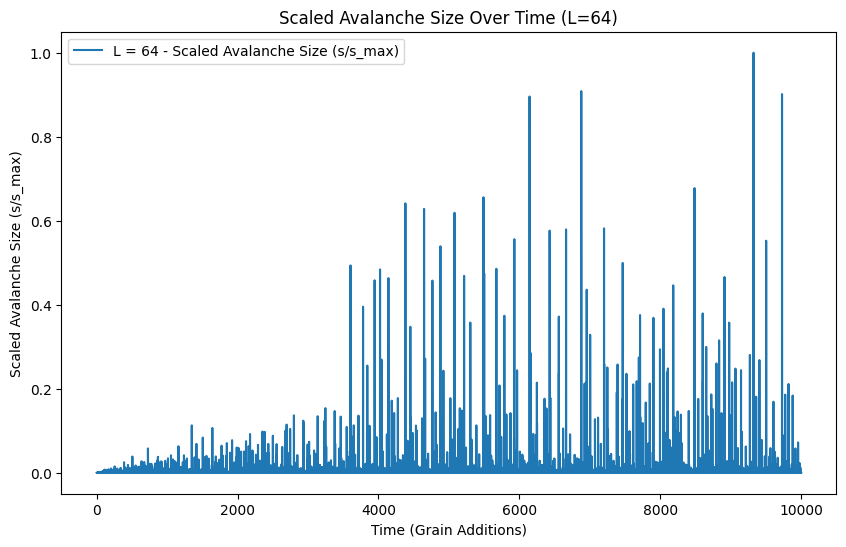

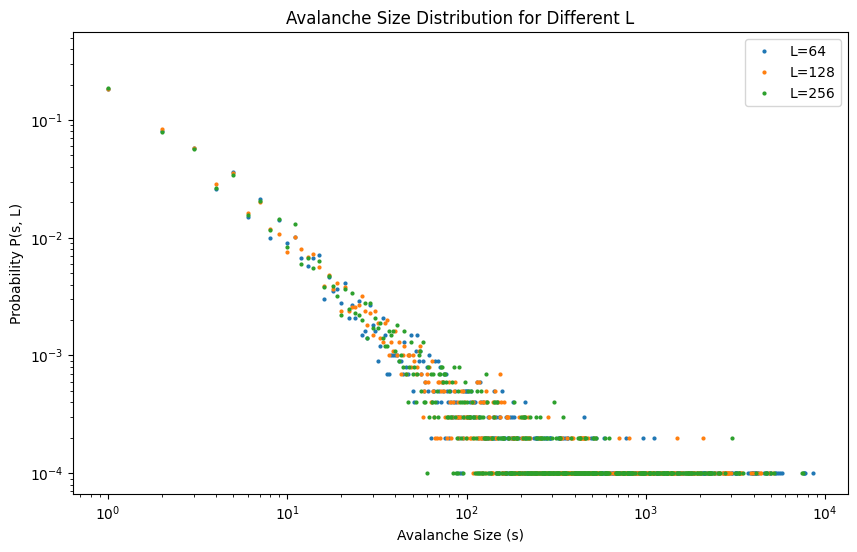

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L_values = [64, 128, 256]  # Different system sizes for scaling
T = 10000  # Number of grain additions
thresholds = [1, 2]  # Possible slope thresholds

# Function to initialize the system
def initialize_system(L):
    z = np.zeros(L, dtype=int)  # Slopes
    zT = np.random.choice(thresholds, size=L)  # Thresholds
    return z, zT

# Function to perform relaxation
def relax(z, zT, L):
    avalanche_size = 0
    while np.any(z > zT):  # Continue relaxing while slopes exceed thresholds
        for i in range(L):
            if z[i] > zT[i]:
                avalanche_size += 1  # Count relaxation event
                zT[i] = np.random.choice(thresholds)  # Assign new random threshold
                
                if i == 0:  # First site
                    z[i] -= 2
                    z[i + 1] += 1
                elif i == L - 1:  # Last site
                    z[i] -= 1
                    z[i - 1] += 1
                else:  # Middle sites
                    z[i] -= 2
                    z[i - 1] += 1
                    z[i + 1] += 1
    return avalanche_size

# Oslo model simulation
def oslo_model(L, T):
    z, zT = initialize_system(L)
    avalanche_sizes = []
    for t in range(T):
        z[0] += 1  # Add a grain to the leftmost site
        avalanche_size = relax(z, zT, L)  # Relax the system
        avalanche_sizes.append(avalanche_size)
    return avalanche_sizes

# Statistical analysis and plotting
def plot_results(avalanche_sizes, L_values):
    # Scaled avalanche size plot for L = 64 only
    plt.figure(figsize=(10, 6))
    for L in [64]:  # Only plot for L = 64
        avalanche_sizes_L64 = avalanche_sizes[L_values.index(L)]
        s_max = max(avalanche_sizes_L64)
        scaled_sizes = np.array(avalanche_sizes_L64) / s_max
        plt.plot(scaled_sizes, label=f"L = {L} - Scaled Avalanche Size (s/s_max)")
    
    plt.xlabel("Time (Grain Additions)")
    plt.ylabel("Scaled Avalanche Size (s/s_max)")
    plt.title("Scaled Avalanche Size Over Time (L=64)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for L in L_values:
        avalanche_sizes_L = avalanche_sizes_all[L_values.index(L)]
        sizes, counts = np.unique(avalanche_sizes_L, return_counts=True)
        probabilities = counts / np.sum(counts)  # Normalize probabilities
        plt.loglog(sizes, probabilities, 'o', label=f"L={L}", markersize=2)
    
    plt.xlabel("Avalanche Size (s)")
    plt.ylabel("Probability P(s, L)")
    plt.title("Avalanche Size Distribution for Different L")
    plt.legend()
    plt.show()

# Main Execution
avalanche_sizes_all = []

# Run simulation for different L values and store results
for L in L_values:
    print(f"Simulating for L = {L}...")
    avalanche_sizes = oslo_model(L, T)
    avalanche_sizes_all.append(avalanche_sizes)

# Plot the results for all L values on the same plot
plot_results(avalanche_sizes_all, L_values)
